## Exploratory data analysis, Visualization and Q. -answering  Pipeline Accidents in the US , 2010 On  - 

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import os,sys
        

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
#rint(os.getcwd())
print(os.listdir(os.getcwd()))
files = os.listdir(os.getcwd())
data_file = files[2]

try:
    data = pd.read_csv(data_file)
except FileNotFoundError as e:
    print("Excel file not found " + str(e) + ' -- please ensure The file is in your current working directory, now exiting program...')
    #return False

except IOError as e:
    print("invalid data format encountered in file " + str(e) + ' -- please ensure The file content is in the corre3ct format, now exiting program...')
    #return False

except Exception as err:
    print('Specific error is : ' + str(err))
    #return False


pd.set_option("display.max_columns", None)

data.head(10000)


['.git', '.ipynb_checkpoints', 'database.csv', 'OilPipelineAccidents', 'pipelineAccidentAnalyser.py', 'README.md', 'unit_tests', 'Untitled.ipynb', 'validere_DavidCrowleyAssign_1-Copy1.ipynb', 'validere_DavidCrowleyAssign_1.ipynb']


Report Number  Supplemental Number  Accident Year   Accident Date/Time  \
0          20100016                17305           2010     1/1/2010 7:15 AM   
1          20100254                17331           2010     1/4/2010 8:30 AM   
2          20100038                17747           2010    1/5/2010 10:30 AM   
3          20100260                18574           2010     1/6/2010 7:30 PM   
4          20100030                16276           2010     1/7/2010 1:00 PM   
5          20100021                17161           2010    1/8/2010 11:38 PM   
6          20110036                18052           2010    1/9/2010 12:15 AM   
7          20100255                18584           2010     1/9/2010 1:12 AM   
8          20100261                18050           2010    1/10/2010 7:46 PM   
9          20100024                18390           2010    1/11/2010 2:30 PM   
10         20100150                15205           2010    1/11/2010 2:30 PM   
11         20100262                15399           2010    1/11/2010 2:47 PM   
12         20100234                18134           2010    1/11/2010 3:00 PM   
13         20100026                17874           2010   1/11/2010 11:00 PM   
14         20100106                17751           2010   1/12/2010 10:25 AM   
15         20100082                17824           2010    1/12/2010 2:30 PM   
16         20100037                18592           2010    1/12/2010 7:08 PM   
17         20100025                17505           2010    1/13/2010 7:36 AM   
18         20110071                18051           2010    1/13/2010 1:30 PM   
19         20100100                17975           2010    1/13/2010 3:30 PM   
20         20100057                17557           2010    1/14/2010 1:15 PM   
21         20110083                17836           2010    1/15/2010 7:05 AM   
22         20100231                15700           2010    1/15/2010 3:00 PM   
23         20100071                17807           2010   1/18/2010 10:00 AM   
24         20100031                17419           2010    1/19/2010 1:10 PM   
25         20100087                18354           2010    1/19/2010 8:00 PM   
26         20100091                17835           2010    1/21/2010 9:30 AM   
27         20100177                15873           2010   1/21/2010 12:30 PM   
28         20100257                17800           2010    1/21/2010 6:43 PM   
29         20120021                17357           2010   1/22/2010 12:05 PM   
30         20100072                17806           2010   1/24/2010 12:30 PM   
31         20100017                20768           2010   1/25/2010 11:07 AM   
32         20100018                17492           2010    1/27/2010 3:30 PM   
33         20100084                17313           2010   1/28/2010 11:00 AM   
34         20110376                17761           2010     2/2/2010 8:00 AM   
35         20100244                17856           2010     2/4/2010 3:10 PM   
36         20100032                17394           2010    2/6/2010 11:30 AM   
37         20100233                18026           2010    2/8/2010 12:20 PM   
38         20100256                17808           2010    2/9/2010 10:00 AM   
39         20100253                17861           2010     2/9/2010 3:25 PM   
40         20100001                15751           2010    2/16/2010 7:42 AM   
41         20100036                17417           2010    2/17/2010 5:45 PM   
42         20100004                19086           2010    2/19/2010 6:50 AM   
43         20100009                17618           2010    2/20/2010 6:30 AM   
44         20100005                17663           2010   2/21/2010 12:45 PM   
45         20100003                18021           2010   2/22/2010 10:38 AM   
46         20100006                17891           2010   2/22/2010 10:56 AM   
47         20100007                17296           2010   2/23/2010 11:30 PM   
48         20100008                19253           2010    2/25/2010 4:50 AM   
49    

In [22]:
data_liq_type = data['Liquid Type'];
data['Liquid Type'].unique()

array(['HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS', 'CRUDE OIL',
       'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID',
       'CO2 (CARBON DIOXIDE)',
       'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)'],
      dtype=object)

In [23]:
uniq_data_liquid_types = data_liq_type.unique()

In [24]:
len(uniq_data_liquid_types)

5

In [25]:

#cols_of_interest = ['Accident Date/Time','Accident State','Pipeline Location','Liquid Type','Net Loss (Barrels)','All Costs']
#data = data[cols_of_interest]

data[['Net Loss (Barrels)', 'All Costs']].describe()


Net Loss (Barrels)     All Costs
count         2795.000000  2.795000e+03
mean           132.194050  8.340332e+05
std           1185.019252  1.657830e+07
min              0.000000  0.000000e+00
25%              0.000000  5.039500e+03
50%              0.000000  2.312900e+04
75%              2.000000  1.172325e+05
max          30565.000000  8.405261e+08

In [11]:
# trying to aswer the Questions :

In [26]:
# Net barrel loss by liquid type
LiquidDamage = data.groupby('Liquid Type')['Net Loss (Barrels)'].sum().sort_values(ascending=False);

In [27]:
LiquidDamage

Liquid Type
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS              251938.68
CRUDE OIL                                                62605.21
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       46816.96
CO2 (CARBON DIOXIDE)                                      8121.52
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)         0.00
Name: Net Loss (Barrels), dtype: float64

In [28]:
# Net barrel loss by liquid type
data.columns
#LiquidNameDamage = data.groupby('Liquid Name')['Net Loss (Barrels)'].sum().sort_values(ascending=False);

Index(['Report Number', 'Supplemental Number', 'Accident Year',
       'Accident Date/Time', 'Operator ID', 'Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City',
       'Accident County', 'Accident State', 'Accident Latitude',
       'Accident Longitude', 'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition',
       'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All

In [15]:
pd.set_option("display.max_rows", None)
LiquidNameDamage

NameError: name 'LiquidNameDamage' is not defined

In [29]:
## how many accidents by liquid occurrence :
data['Liquid Name'].describe()


count         222
unique         69
top       PROPANE
freq           26
Name: Liquid Name, dtype: object

In [45]:
# most accidents by liquid type (name) :
data['Liquid Name'].value_counts()

PROPANE                                     26
ETHANE                                      24
Y-GRADE                                     23
ETHYLENE                                    17
PROPYLENE                                   15
CONDENSATE                                  13
NATURAL GASOLINE                            12
BUTANE                                      11
DILUTE PROPYLENE                             4
ISOBUTANE                                    4
VACUUM GAS OIL                               3
Y GRADE                                      3
ETHANE/PROPANE                               3
ETHANE/PROPANE MIX                           3
NAPHTHA                                      3
REFINERY GRADE PROPYLENE (RGP)               3
14# NATURAL GASOLINE                         2
ETHANE/PROPANE BLEND                         2
REFINERY GRADE BUTANE (RGB)                  1
ETHANE / PROPANE                             1
STAR 12 LUBE OIL                             1
NAPTHA       

In [46]:
# So , seeems to be the most flammable liquids like Ethane,propane , Etheleyene and condenstaes which 
# help cause accidents.
# Also when they are pure , rather than mixed this is clearly an issue, as mixtures at most cause 3 accidents over these years,
# whereas all pure liquids begining at BUTANE cause accidents in the tens , starting with BUtane at 11 alone !




In [30]:
# Do a pie chart showing the top 10-15 or so to display this graphically :

liquid_causes = data['Liquid Name'].value_counts();
top14_liq_causes = liquid_causes[:15];

total_accidents = data['Liquid Name'].count()

masses = []
for x in top14_liq_causes:
    masses.append(x/total_accidents)
    
df = pd.DataFrame({'masses': masses},
                   #'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])    

print('masses = ' + str(masses))
#pd.plot.pie()

ValueError: Shape of passed values is (15, 1), indices imply (3, 1)

In [53]:
 len(data['Liquid Name'].unique())

70

In [31]:
data['Liquid Name'].value_counts()

PROPANE                                     26
ETHANE                                      24
Y-GRADE                                     23
ETHYLENE                                    17
PROPYLENE                                   15
CONDENSATE                                  13
NATURAL GASOLINE                            12
BUTANE                                      11
DILUTE PROPYLENE                             4
ISOBUTANE                                    4
NAPHTHA                                      3
VACUUM GAS OIL                               3
Y GRADE                                      3
ETHANE/PROPANE                               3
REFINERY GRADE PROPYLENE (RGP)               3
ETHANE/PROPANE MIX                           3
14# NATURAL GASOLINE                         2
ETHANE/PROPANE BLEND                         2
ATMOSPHERIC GAS OIL                          1
PP MIX                                       1
ULTRA LOW SULFUR DIESEL                      1
CRUDE CONDENS

In [65]:
data['Cause Category'].value_counts()

MATERIAL/WELD/EQUIP FAILURE    1435
CORROSION                       592
INCORRECT OPERATION             378
NATURAL FORCE DAMAGE            118
ALL OTHER CAUSES                118
EXCAVATION DAMAGE                97
OTHER OUTSIDE FORCE DAMAGE       57
Name: Cause Category, dtype: int64

In [32]:
data['Cause Subcategory'].value_counts()

INTERNAL                                             362
PUMP OR PUMP-RELATED EQUIPMENT                       296
NON-THREADED CONNECTION FAILURE                      286
EXTERNAL                                             230
OTHER EQUIPMENT FAILURE                              204
MALFUNCTION OF CONTROL/RELIEF EQUIPMENT              171
THREADED CONNECTION/COUPLING FAILURE                 151
CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED    112
OTHER INCORRECT OPERATION                             86
INCORRECT VALVE POSITION                              84
MISCELLANEOUS                                         76
INCORRECT INSTALLATION                                72
MANUFACTURING-RELATED                                 70
OVERFILL/OVERFLOW OF TANK/VESSEL/SUMP                 69
FAILURE OF EQUIPMENT BODY                             67
DEFECTIVE OR LOOSE TUBING/FITTING                     62
TEMPERATURE                                           57
THIRD PARTY EXCAVATION DAMAGE  

In [33]:
data['Pipeline Type'].value_counts()

ABOVEGROUND        1475
UNDERGROUND         985
TANK                301
TRANSITION AREA      16
Name: Pipeline Type, dtype: int64

In [34]:
data['Pipeline Location'].value_counts()

ONSHORE     2777
OFFSHORE      18
Name: Pipeline Location, dtype: int64

In [ ]:
## Answering Q.1, 

# The results here clearly demonstarte that liquids which are not mixed - pure flammable ones like Etane, Porpane etc are involved in the worst accidents,
# combining this with the 'Material failure' data - which has material - ie liquid as the worst offender, its seems to be at least strongly correlated with 
# the use of these materials/liquis inside the pipelines alone.

# It can be seen here clearly that, for the Pipeline type, about 50% of all accidents occur for the above ground pipelines .
# ~ 2/3 of this for underground and much less so for tank and transition area respectively.

## For Pipeline location - offshore accounts for the vast majority of accidents - 2777/2795 ~ 99% of cases.

In [ ]:
# Lets list the relevant Physical and chemical properties of liquids :

# Physical:
    
#  1) density
#  2) viscosity
#  3) specific heat capacity
#  4) surface tension
    
#  5) entropy 
#  6) enthalpy
#  7) Gibb's free energy
#  8) API [American petroleum Institute] - gravity (??)


    

## Introduce a time dependence to the analysis 


In [66]:
accidents_per_year = data['Accident Year'].value_counts().sort_index();
accidents_per_year

2010    350
2011    345
2012    366
2013    401
2014    454
2015    462
2016    415
2017      2
Name: Accident Year, dtype: int64

In [67]:
Accidents_Year_shifted_ints = accidents_per_year.astype(int)

In [68]:
Accidents_Year_shifted_ints

2010    350
2011    345
2012    366
2013    401
2014    454
2015    462
2016    415
2017      2
Name: Accident Year, dtype: int32

In [95]:
plot_df = pd.DataFrame( {'times':list(Accidents_Year_shifted_ints.index), 'No. Accidents':list(data['Accident Year'].value_counts())} )

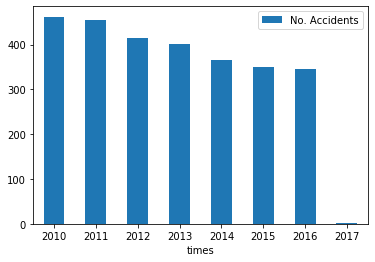

In [96]:
ax = plot_df.plot.bar(x='times', y='No. Accidents',rot=0)

In [ ]:
# The change in no. of pipeline sccidents has trended down almost monotonically every year from 2010 at its peak in the US up to 2017.

In [52]:
len(list(data['Accident Year Ints']))

2795

In [78]:
data['Accident Year'].value_counts().index

Int64Index([2015, 2014, 2016, 2013, 2012, 2010, 2011, 2017], dtype='int64')

In [79]:
data['Accident Year'].value_counts().index[0]

2015

In [84]:
data['Accident Year'].value_counts().index.values()

TypeError: 'numpy.ndarray' object is not callable

In [85]:
list(data['Accident Year'].value_counts().index)

[2015, 2014, 2016, 2013, 2012, 2010, 2011, 2017]

In [101]:
data[data['Liquid Type'] == 'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS']['Liquid Subtype'].value_counts()

LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)    188
OTHER HVL                                                   171
ANHYDROUS AMMONIA                                            55
Name: Liquid Subtype, dtype: int64

In [103]:
data[data['Liquid Type'] == 'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS'].groupby('Liquid Subtype')['Net Loss (Barrels)'].sum().sort_values(ascending=False)

Liquid Subtype
OTHER HVL                                                   133846.94
LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)    115707.56
ANHYDROUS AMMONIA                                             2350.83
Name: Net Loss (Barrels), dtype: float64

In [106]:
data[data['Liquid Explosion'] == 'YES']


Report Number  Supplemental Number  Accident Year  Accident Date/Time  \
176        20100163                16455           2010   7/5/2010 10:40 AM   
392        20110076                15657           2011   2/8/2011 12:18 PM   
590        20110380                16653           2011    9/8/2011 7:50 AM   
674        20120011                17672           2011   12/8/2011 9:15 AM   
898        20120240                17441           2012   7/21/2012 5:35 PM   
953        20120284                20643           2012   9/13/2012 3:28 PM   
1178       20130153                20737           2013    4/1/2013 9:32 AM   
1340       20130307                20452           2013  8/12/2013 11:10 PM   
1751       20140318                21848           2014    8/6/2014 2:02 PM   
1849       20140440                21125           2014  10/28/2014 3:15 AM   
1911       20150025                20728           2014  12/24/2014 9:49 PM   
1912       20150026                21312           2014  12/25/2014 8:57 AM   
1951       20150071                21327           2015   1/26/2015 9:38 AM   
2453       20160088                21494           2016   2/24/2016 3:58 AM   
2758       20160418                22039           2016  11/29/2016 6:27 PM   

      Operator ID                      Operator Name  \
176          3445                     DIXIE PIPELINE   
392         31618  ENTERPRISE PRODUCTS OPERATING LLC   
590          2731               CHEVRON PIPE LINE CO   
674           300              PLAINS PIPELINE, L.P.   
898          2731               CHEVRON PIPE LINE CO   
953         31618  ENTERPRISE PRODUCTS OPERATING LLC   
1178        32147             MARATHON PIPE LINE LLC   
1340        31618  ENTERPRISE PRODUCTS OPERATING LLC   
1751        15774  NORTH DAKOTA PIPELINE COMPANY LLC   
1849        39010          BLUE RACER MIDSTREAM, LLC   
1911        30826            WILLIAMS FIELD SERVICES   
1912        32147             MARATHON PIPE LINE LLC   
1951        31618  ENTERPRISE PRODUCTS OPERATING LLC   
2453         3445         DIXIE PIPELINE COMPANY LLC   
2758        31618  ENTERPRISE PRODUCTS OPERATING LLC   

                  Pipeline/Facility Name Pipeline Location Pipeline Type  \
176                       DIXIE PIPELINE           ONSHORE   UNDERGROUND   
392     ENTERPRISE WEST STORAGE FACILITY           ONSHORE   ABOVEGROUND   
590                       WEST TEXAS LPG           ONSHORE   UNDERGROUND   
674                          JAL STATION           ONSHORE          TANK   
898   PT. ARTHUR TO MT. BELVIEU ETHYLENE           ONSHORE   ABOVEGROUND   
953                    SEMINOLE PIPELINE           ONSHORE   UNDERGROUND   
1178                  MARTINSVILLE CRUDE           ONSHORE   ABOVEGROUND   
1340      MAPL EAST LEG - MORRIS LATERAL           ONSHORE   UNDERGROUND   
1751                   ALEXANDER STATION           ONSHORE   ABOVEGROUND   
1849                 8" BERNE TO NATRIUM           ONSHORE   UNDERGROUND   
1911    OAK GROVE TO HOUSTON ETHANE LINE           ONSHORE   ABOVEGROUND   
1912                      CATLIN STATION           ONSHORE   ABOVEGROUND   
1951                              ATEX-1           ONSHORE   UNDERGROUND   
2453     MONT BELVIEU TO APEX (MAINLINE)           ONSHORE   UNDERGROUND   
2758                           EAST RED            ONSHORE   UNDERGROUND   

                                            Liquid Type  \
176          HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
392          HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
590          HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
674                                           CRUDE OIL   
898          HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
953          HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
1178                                          CRUDE OIL   
1340         HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
1751                                          CRUDE OIL   
1849         HVL OR OTHER FLAMMABLE O

In [107]:
data['All Costs'].mean()

834033.2461538462

In [108]:
data['All Costs'].max()

840526118

In [115]:
data['All Costs'].sort_values(ascending=False).head(100)

194     840526118
2103    142931884
523     135000000
1173     91300000
2675     66234072
241      47393566
457      35728903
160      32233740
133      28938000
1833     24323483
893      23223508
1166     21819684
311      20833925
334      19495905
703      17904594
1320     16986690
722      15950000
357      15700000
2258     14642600
86       13933600
1245     13844274
213      13184000
1836     11702787
1406     11235699
1163     10262149
1172     10000000
1016      9800000
2501      9496950
1192      9275000
2490      9068339
1935      8059063
824       7670662
565       7669065
1676      7487000
1582      7174939
2667      6940710
1951      6910591
2163      6281206
901       6213980
2584      6157625
932       6023171
1231      5928050
662       5913500
1113      5201153
907       5014408
1342      4917350
542       4741387
312       4709566
1422      4588099
21        4575000
2541      4540000
376       4468256
1959      4430000
2638      4355500
2385      4200000
5         